In [77]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
order_items_df = pd.read_csv("./data/olist_order_items_dataset.csv")
products_df = pd.read_csv("./data/olist_products_dataset.csv")
merged_df = pd.merge(order_items_df, products_df, on="product_id", how="inner")
print("----Dataframe shapes----")
print(f'Order items: {order_items_df.shape}')
print(f'Products: {products_df.shape}')
print(f'Merged: {merged_df.shape}')
print()

merged_df = merged_df[['order_id', 'product_id', 'price', 'product_category_name']]
merged_df.rename(columns={merged_df.columns[2]:'profit'}, inplace=True)
merged_df.sample(10)


----Dataframe shapes----
Order items: (112650, 7)
Products: (32951, 9)
Merged: (112650, 15)



,order_id,product_id,profit,product_category_name
62577,6cfb7323342e3d0389b8e67f9afa1937,59fc88d07b8100b80600e42f3e5ac79d,59.90,housewares
96530,7d316b369d4c6b0a4ebeebbff5f65466,1d691d8ace0e9d0e00de0569faf0ae04,39.90,housewares
80418,3eaa0a2e223ae1b2ed934e0274bdd0cb,c801dac0ec4865c5d42cf44b03a7d626,39.99,bed_bath_table
57572,41c843dab306ff15365492a2dd8c3cef,42ca857208d059f51c317b503000c385,119.99,pet_shop
19868,e102b2494339fab55c3daf18187409a6,3db75f31b76375c502f64d550dcd1166,31.90,computers_accessories
40278,bbac13f5b68d5b86c46f0a89a014b5e5,830345ab5d2e365c7c6b91459119ea2d,478.04,health_beauty
92222,97855256a6d84e478ae2894a9f8b0209,98475d9717984fc80373a380bbfb0d81,237.99,bed_bath_table
35305,629a311d2d78caf11bd453dd536c6da2,be0dbdc3d67d55727a65d4cd696ca73c,79.79,computers_accessories
97589,82ae1c851b481c7c7f6fbfdfb05e5131,250448da216b8ed83a1afa9b092fd938,399.50,construction_tools_lights
46298,d95c7210ba7d2249083e45536f2d0a27,37ca4ae4320cdda8a0ef625049f4cb88,85.99,bed_bath_table


In [79]:
count_unique_order_ids = merged_df['order_id'].nunique()
count_unique_product_ids = merged_df['product_id'].nunique()
count_unique_categories = merged_df['product_category_name'].nunique()

result_df = pd.DataFrame({
    'Metric': ['Number of unique Order IDs', 'Number of unique Product IDs', 'Number of unique Product Categories'],
    'Count': [count_unique_order_ids, count_unique_product_ids, count_unique_categories]
})

total_rows = len(merged_df)
result_df['Percentage'] = (result_df['Count'] / total_rows) * 100

result_df['Percentage'] = result_df['Percentage'].round(2)

result_df['Percentage'] = result_df['Percentage'].astype(str) + '%'

table = tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False)

table_title = "Summary of Unique Counts in DataFrame"
table_with_title = f"{table_title}\n{table}"

print(table_with_title)


Summary of Unique Counts in DataFrame
+-------------------------------------+-------+------------+
|               Metric                | Count | Percentage |
+-------------------------------------+-------+------------+
|     Number of unique Order IDs      | 98666 |   87.59%   |
|    Number of unique Product IDs     | 32951 |   29.25%   |
| Number of unique Product Categories |  73   |   0.06%    |
+-------------------------------------+-------+------------+


In [80]:
missing_values = merged_df.isnull().sum()

total_cells = merged_df.size

missing_percentage = (missing_values / total_cells) * 100

result_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': missing_percentage.round(2).astype(str) + '%'
})

table = tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False)

table_title = "Missing Values in DataFrame"
table_with_title = f"{table_title}\n{table}"

print(table_with_title)


Missing Values in DataFrame
+-----------------------+----------------+------------+
|        Column         | Missing Values | Percentage |
+-----------------------+----------------+------------+
|       order_id        |       0        |    0.0%    |
|      product_id       |       0        |    0.0%    |
|        profit         |       0        |    0.0%    |
| product_category_name |      1603      |   0.36%    |
+-----------------------+----------------+------------+


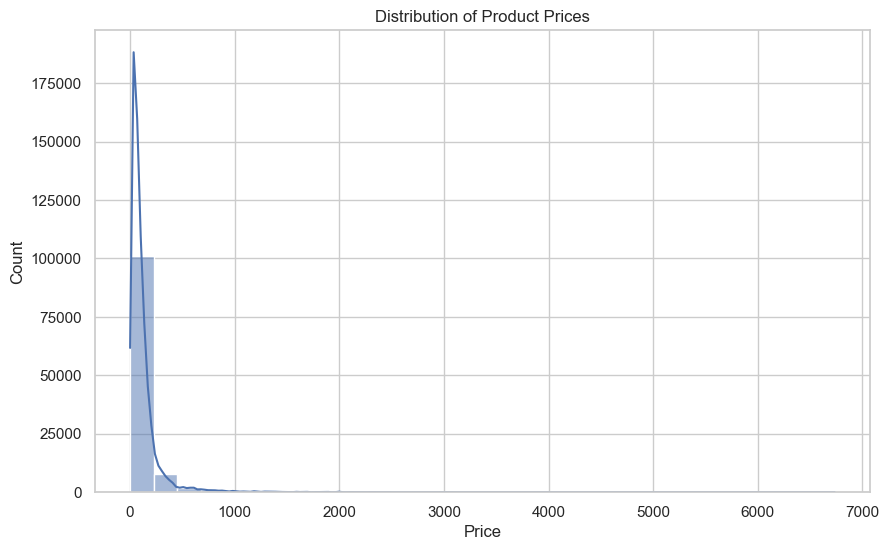

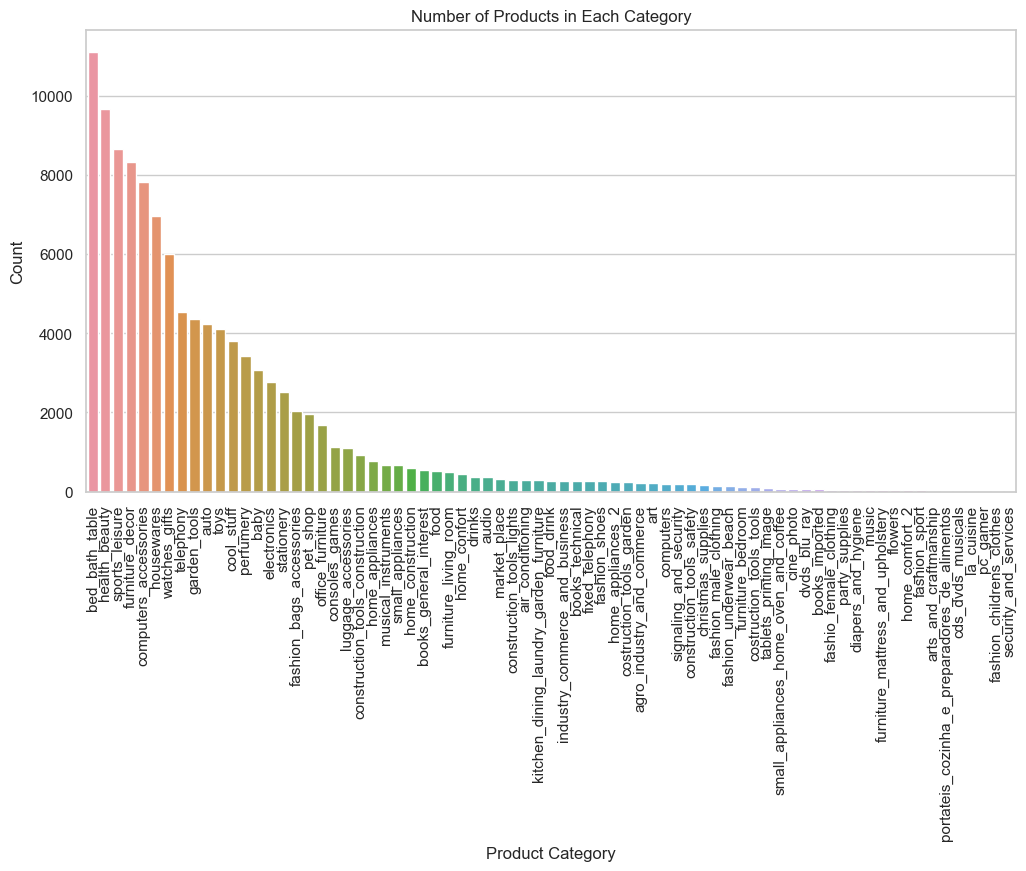

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='profit', bins=30, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='product_category_name', order=merged_df['product_category_name'].value_counts().index)
plt.title("Number of Products in Each Category")
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()


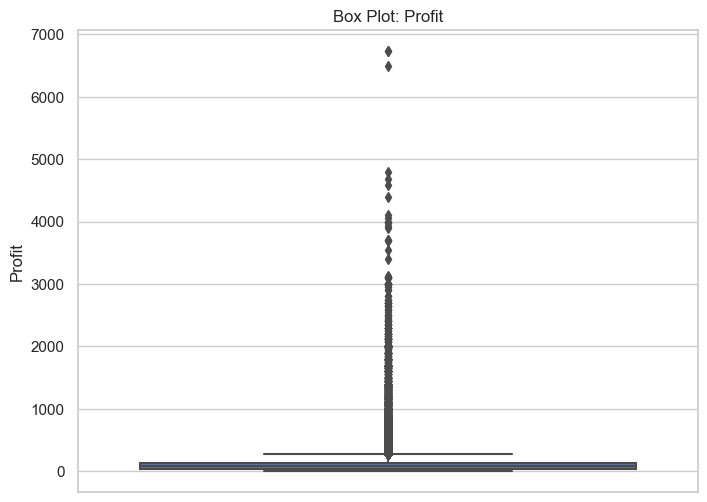

In [82]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6)) 

sns.boxplot(y='profit', data=merged_df)

plt.ylabel('Profit')
plt.title('Box Plot: Profit')

plt.show()


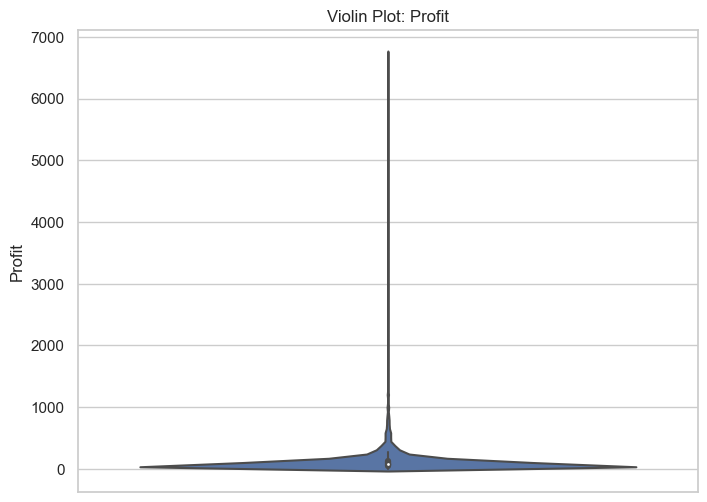

In [83]:
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6)) 

sns.violinplot(y='profit', data=merged_df)

plt.ylabel('Profit')
plt.title('Violin Plot: Profit')

plt.show()


## The top 10 product categories (product_category_name) with the highest profit.

In [84]:
top_categ_by_profit= merged_df.groupby("product_category_name").agg({'order_id':'nunique','profit':'sum'}).sort_values("profit", ascending=False)[:10]
top_categ_by_profit.rename(columns={"order_id":"Quantity", "profit":"Profit Total"}, inplace=True)
top_categ_by_profit

,Quantity,Profit Total
product_category_name,,
health_beauty,8836,1258681.34
watches_gifts,5624,1205005.68
bed_bath_table,9417,1036988.68
sports_leisure,7720,988048.97
computers_accessories,6689,911954.32
furniture_decor,6449,729762.49
cool_stuff,3632,635290.85
housewares,5884,632248.66
auto,3897,592720.11


## The top 10 product categories (product_category_name) with the lowest profit

In [85]:
top_categ_by_profit= merged_df.groupby("product_category_name").agg({'order_id':'nunique','profit':'sum'}).sort_values("profit", ascending=True)[:10]
top_categ_by_profit.rename(columns={"order_id":"Quantity", "profit":"Profit Total"}, inplace=True)
top_categ_by_profit

,Quantity,Profit Total
product_category_name,,
security_and_services,2,283.29
fashion_childrens_clothes,8,569.85
cds_dvds_musicals,12,730.00
home_comfort_2,24,760.27
flowers,29,1110.04
pc_gamer,8,1545.95
diapers_and_hygiene,27,1567.59
arts_and_craftmanship,23,1814.01
la_cuisine,13,2054.99
